In [11]:
# pip install
!pip install -r requirements.txt

# Imports
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import pandas as pd
from pprint import pprint
import copy

# Module imports
from periodic_table import *
print("Imported all.")

Imported all.


You should consider upgrading via the 'C:\Users\TSBus\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.


In [12]:
file_dir = "./assets/data.txt"
columns = ["Atomic Number", "Mass Number", "Counts"]
# Add data to DataFrame
df = pd.DataFrame(columns=columns)
# Reads in data to df
with open(file_dir, "r") as f:
    for line in f:
        stripped_line = line.strip()
        data = list(map(int, stripped_line.split(",")))
        df.loc[len(df)]= data
# Sorts to atomic number
df = df.sort_values(by=["Atomic Number", "Mass Number"])
# Gets rid of any duplicates
df.head(10)

,Atomic Number,Mass Number,Counts
0,1,4,2058
1,1,5,6
2,1,6,6
3,2,5,27
4,2,6,3893
5,2,7,61
6,2,8,90
7,2,9,9
8,2,10,1
9,3,4,26


In [13]:
def get_decay_mode(data):
    info = ""
    for item in data.items():
        if item[0] is not None:
            info += item[0] + ", "
    info = info[:-2]
    return info

In [25]:
# Add in isotope data
df['Symbol'] = df.apply(lambda x: nuc(x['Atomic Number'], x['Mass Number'])["symbol"], axis=1)
df['Iso Symbol'] = df.apply(lambda x: nuc(x['Atomic Number'], x['Mass Number'])["symbol"] + " " + str(x['Atomic Number']) + "-" + str(x['Mass Number']), axis=1)
df['Production Yield'] = df.apply(lambda x: x['Counts'] / df['Counts'].sum(), axis=1)
df['Stable'] = df.apply(lambda x: nuc(x['Atomic Number'], x['Mass Number'])["stable"], axis=1)
df['Half Life'] = df.apply(lambda x: nuc(x['Atomic Number'], x['Mass Number'])["half-life"], axis=1)
df['Decay Modes'] = df.apply(lambda x: get_decay_mode(nuc(x['Atomic Number'], x['Mass Number'])["decay modes"]), axis=1)
df['Plot Colour'] = df.apply(lambda x: "blue" if x['Stable'] else "red", axis=1)
df = df[["Symbol", "Iso Symbol", "Atomic Number", "Mass Number", "Counts", "Production Yield", "Stable", "Half Life", "Decay Modes", "Plot Colour"]]
df

C:\Users\TSBus\AppData\Local\Temp\ipykernel_15184\4118653109.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Symbol'] = df.apply(lambda x: nuc(x['Atomic Number'], x['Mass Number'])["symbol"], axis=1)
C:\Users\TSBus\AppData\Local\Temp\ipykernel_15184\4118653109.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Iso Symbol'] = df.apply(lambda x: nuc(x['Atomic Number'], x['Mass Number'])["symbol"] + " " + str(x['Atomic Number']) + "-" + str(x['Mass Number']), axis=1)


,Symbol,Iso Symbol,Atomic Number,Mass Number,Counts,Production Yield,Stable,Half Life,Decay Modes,Plot Colour
0,H,H 1-4,1,4,2058,5.499555e-05,False,0.000000e+00,N,red
1,H,H 1-5,1,5,6,1.603369e-07,False,8.330000e-23,2N,red
2,H,H 1-6,1,6,6,1.603369e-07,False,2.970000e-22,N,red
3,He,He 2-5,2,5,27,7.215159e-07,False,7.910000e-22,"A, N",red
4,He,He 2-6,2,6,3893,1.040319e-04,False,8.010000e-01,B-,red
...,...,...,...,...,...,...,...,...,...,...
184,Ca,Ca 20-45,20,45,1,2.672281e-08,False,1.400000e+07,B-,red
185,Sc,Sc 21-43,21,43,1,2.672281e-08,False,1.400000e+04,EC,red
186,Sc,Sc 21-44,21,44,1,2.672281e-08,False,1.430000e+04,EC,red
187,Sc,Sc 21-45,21,45,3,8.016843e-08,True,inf,,blue


C:\Users\TSBus\AppData\Local\Temp\ipykernel_15184\3236796061.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(df["Iso Symbol"])


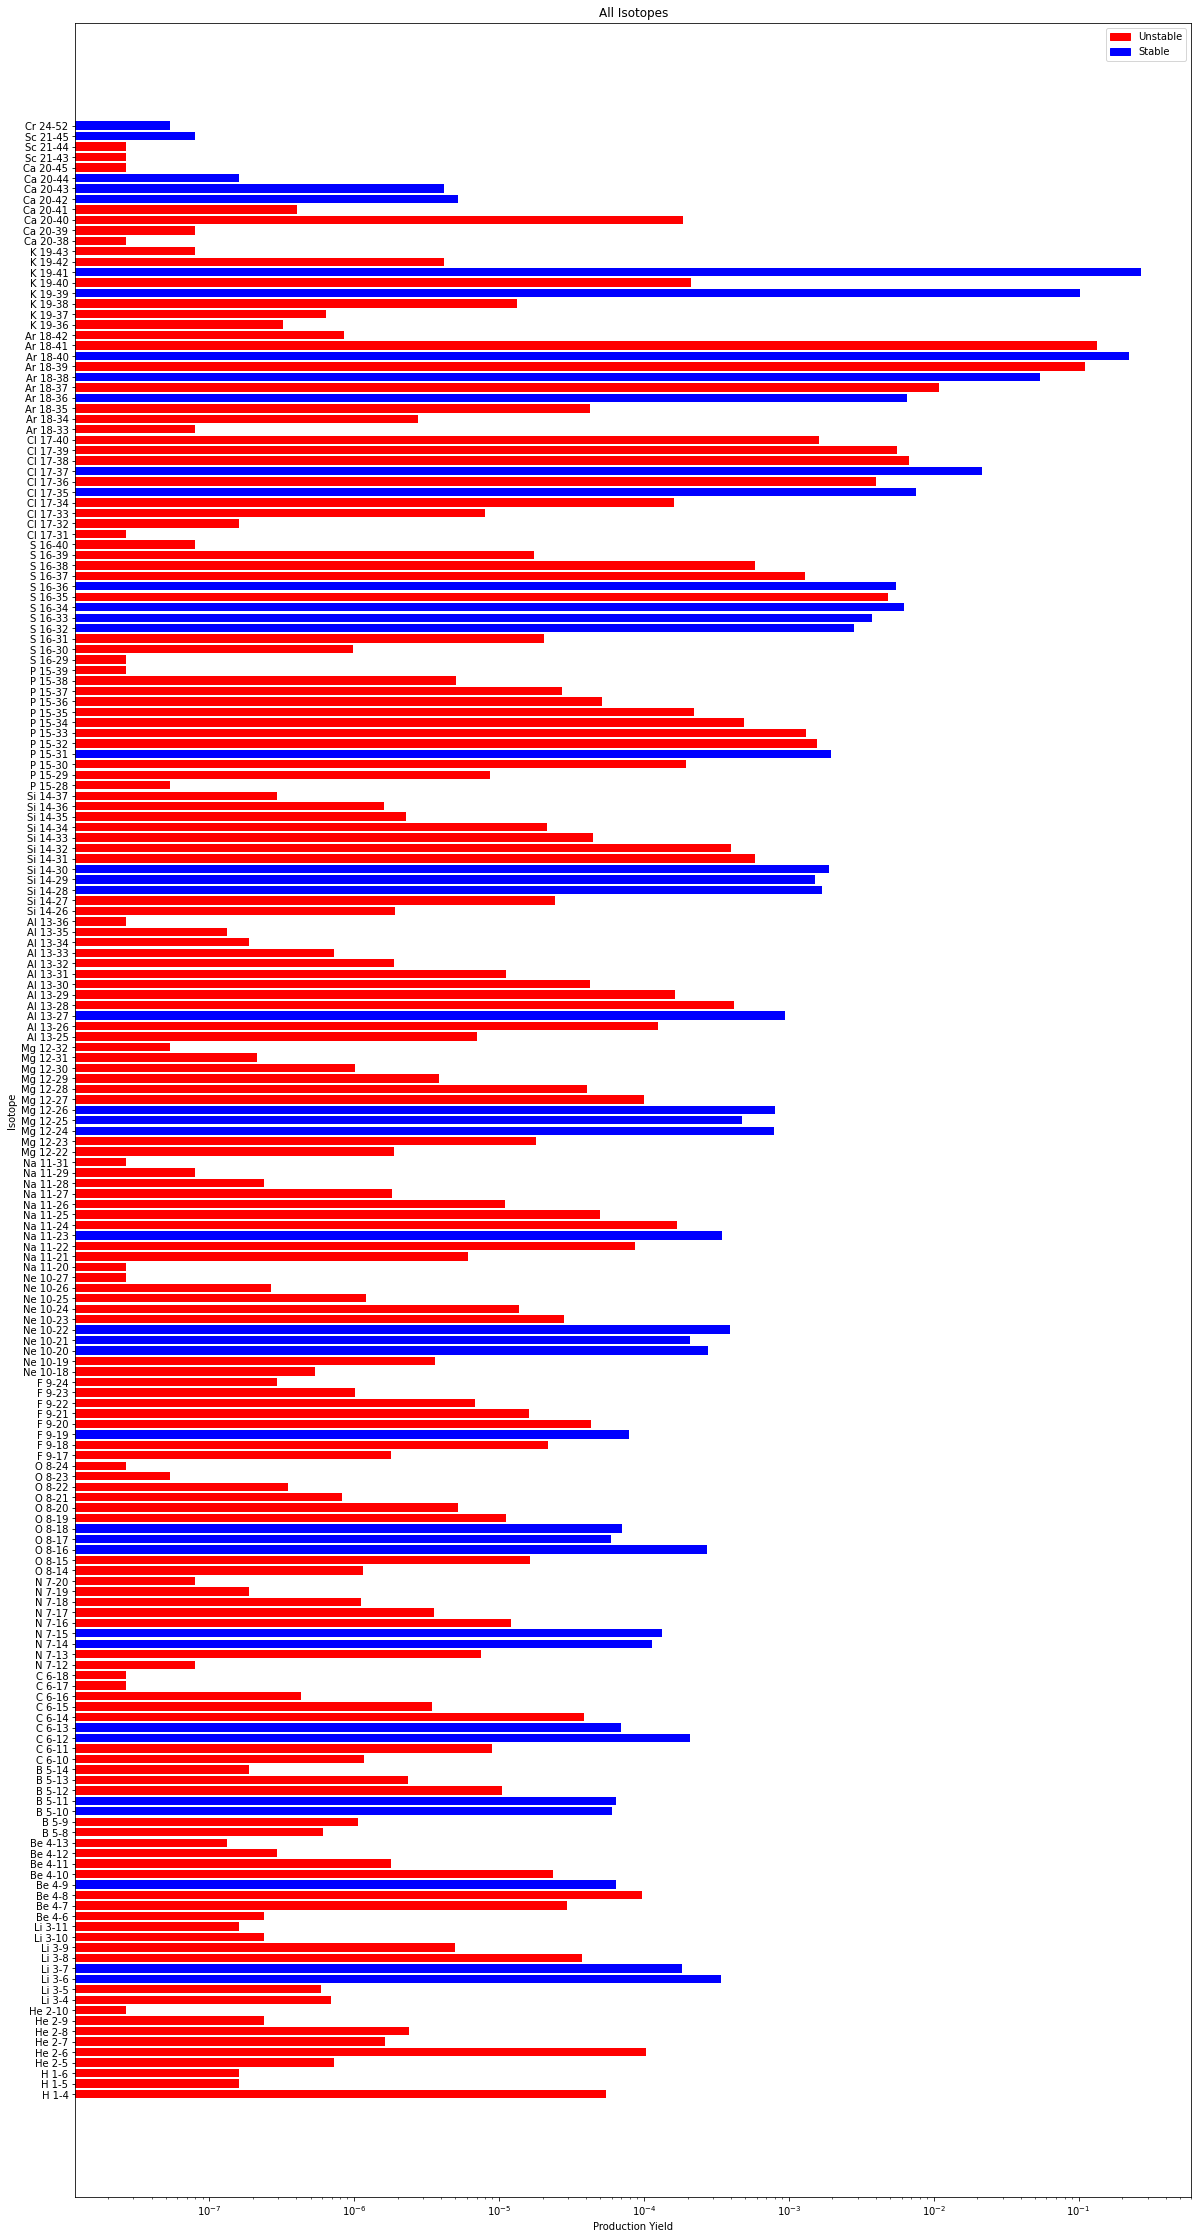

In [15]:
# Plot histogram
figsize=(20,40)
# Plotting
fig, ax = plt.subplots(figsize=figsize)
ax.barh(df.index, df["Production Yield"], log=True, color=df["Plot Colour"])
ax.set_yticklabels(df["Iso Symbol"])
ax.set_yticks(np.arange(len(df)))
ax.set_xlabel("Production Yield")
ax.set_ylabel("Isotope")
ax.set_title("All Isotopes")
red_patch = mpatches.Patch(color="red", label="Unstable")
blue_patch = mpatches.Patch(color="blue", label="Stable")
ax.legend(handles=[red_patch, blue_patch], loc=0)
plt.show()

In [16]:
# Clean unstable isotopes into two datasets
df_unstable = df[df["Stable"] == False]
df_unstable = df_unstable.reset_index()
df_stable = df[df["Stable"] == True]
df_stable = df_stable.reset_index()
print(f"Number of stable isotopes: {len(df) - len(df_unstable)}")
print(f"Number of unstable isotopes: {len(df_unstable)}")
df_unstable, df_stable

Number of stable isotopes: 41
Number of unstable isotopes: 148


(     index  Atomic Number  Mass Number  Counts Symbol Iso Symbol  \
 0        0              1            4    2058      H      H 1-4   
 1        1              1            5       6      H      H 1-5   
 2        2              1            6       6      H      H 1-6   
 3        3              2            5      27     He     He 2-5   
 4        4              2            6    3893     He     He 2-6   
 ..     ...            ...          ...     ...    ...        ...   
 143    179             20           40    7011     Ca   Ca 20-40   
 144    180             20           41      15     Ca   Ca 20-41   
 145    184             20           45       1     Ca   Ca 20-45   
 146    185             21           43       1     Sc   Sc 21-43   
 147    186             21           44       1     Sc   Sc 21-44   
 
      Production Yield  Stable     Half Life Decay Modes Plot Colour  
 0        5.499555e-05   False  0.000000e+00           N         red  
 1        1.603369e-07   Fal

C:\Users\TSBus\AppData\Local\Temp\ipykernel_15184\1977169576.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax_un.set_yticklabels(df_unstable["Iso Symbol"])


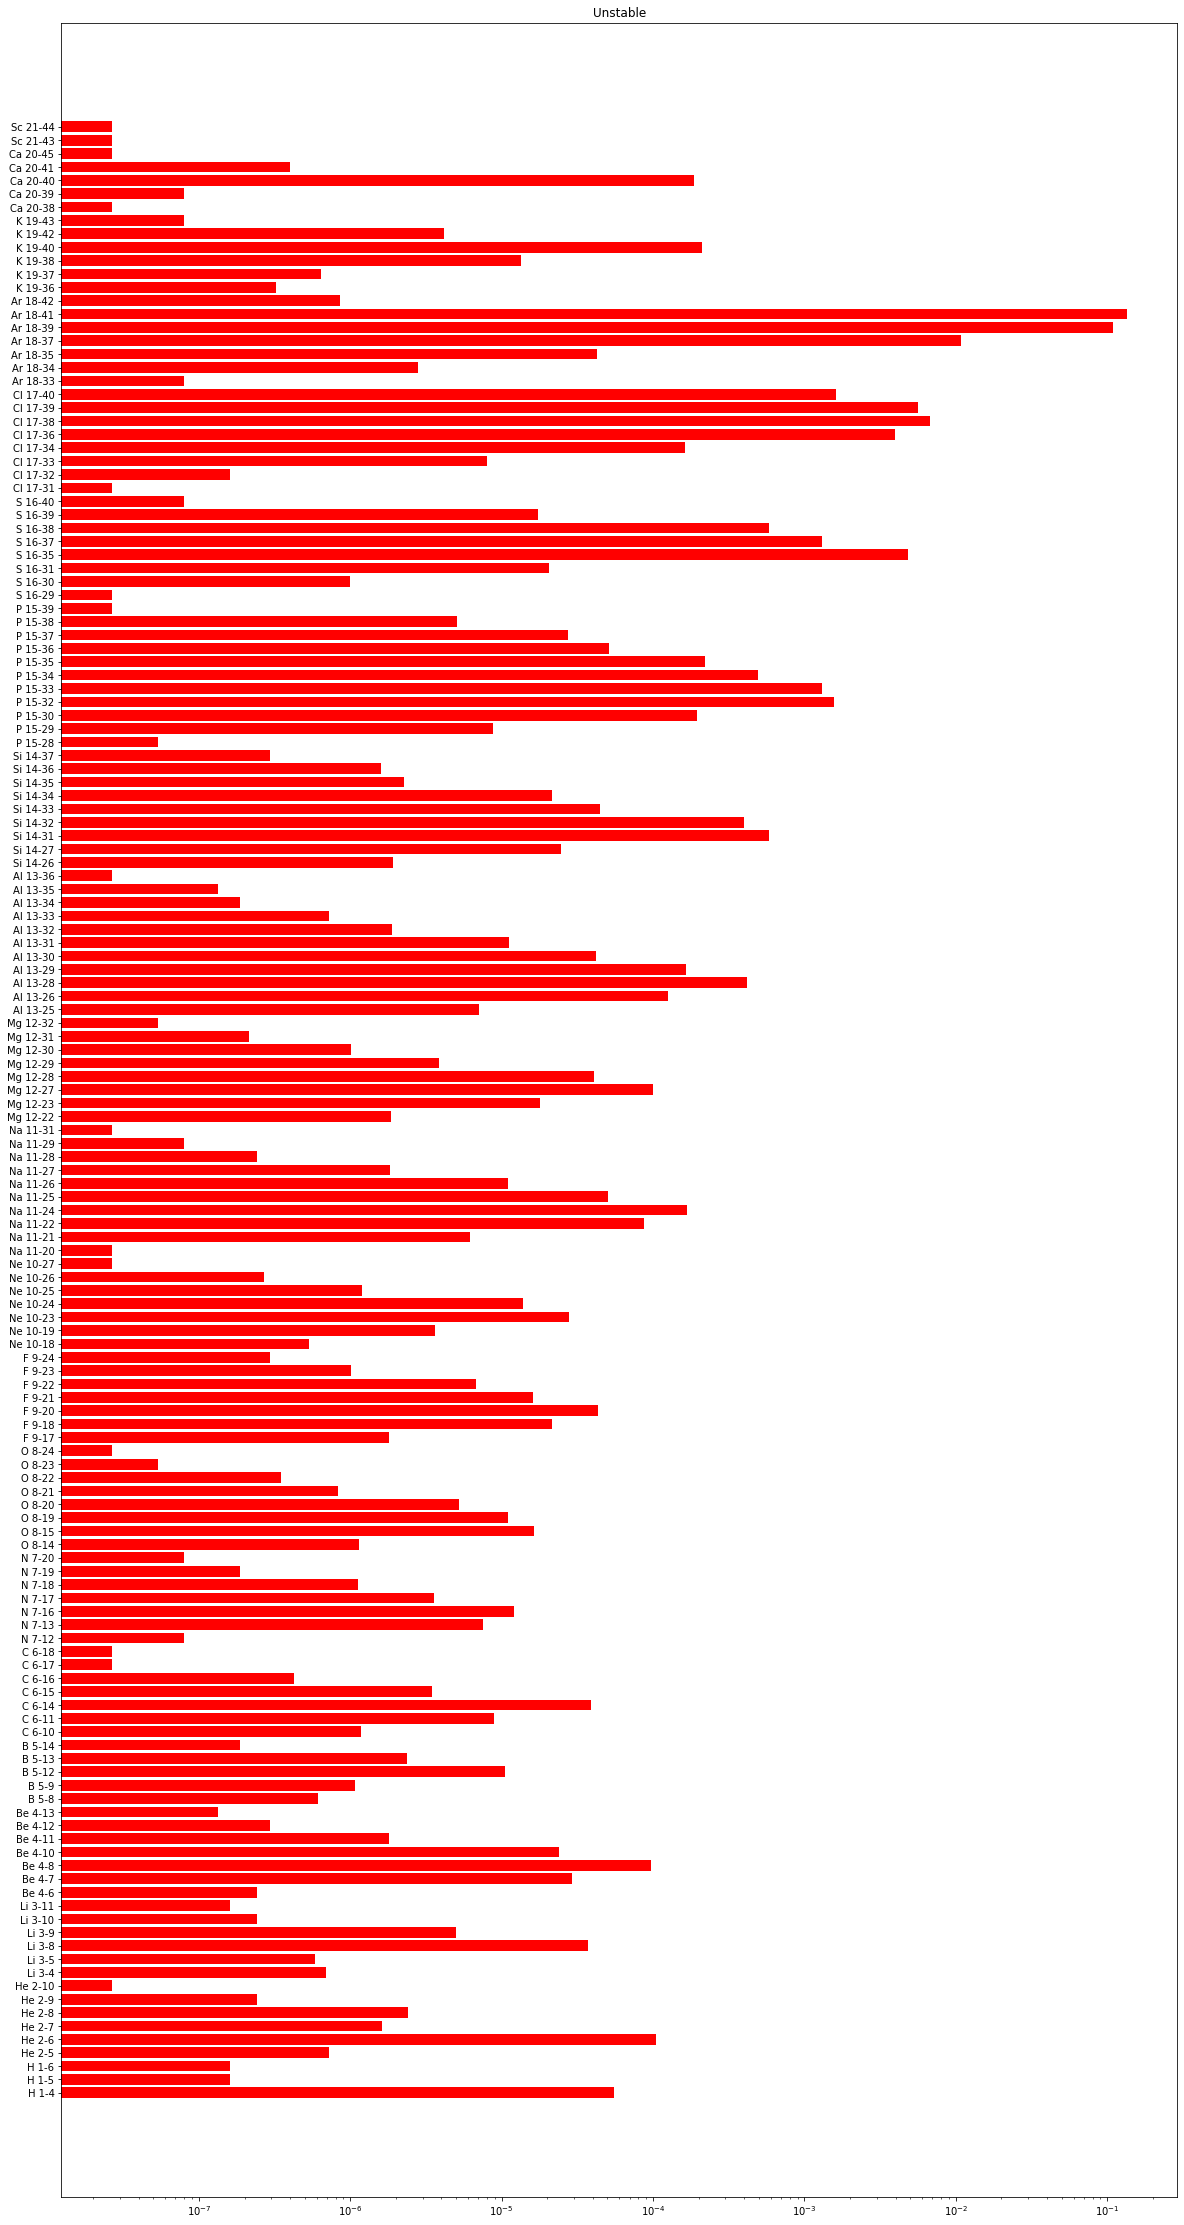

In [17]:
# Plot unstable
fig_un, ax_un = plt.subplots(figsize=figsize)
ax_un.barh(df_unstable.index, df_unstable["Production Yield"], log=True, color=df_unstable["Plot Colour"])
ax_un.set_yticklabels(df_unstable["Iso Symbol"])
ax_un.set_yticks(np.arange(len(df_unstable)))
ax.set_xlabel("Production Yield")
ax.set_ylabel("Isotope")
ax_un.set_title("Unstable")
plt.show()

C:\Users\TSBus\AppData\Local\Temp\ipykernel_15184\3837296555.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax_s.set_yticklabels(df_stable["Iso Symbol"])


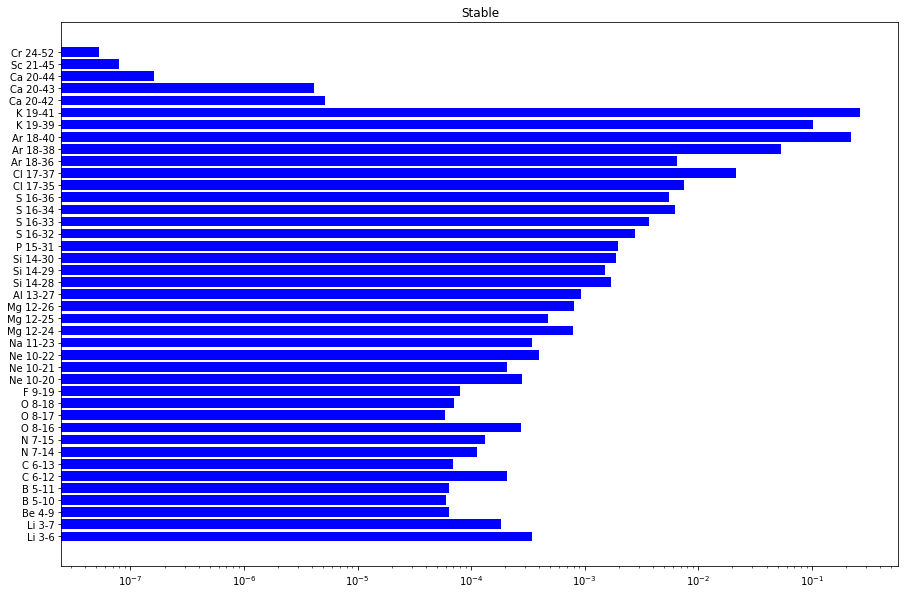

In [18]:
# Plot stable
fig_s, ax_s = plt.subplots(figsize=(15,10))
ax_s.barh(df_stable.index, df_stable["Production Yield"], log=True, color=df_stable["Plot Colour"])
ax_s.set_yticklabels(df_stable["Iso Symbol"])
ax_s.set_yticks(np.arange(len(df_stable)))
ax.set_xlabel("Production Yield")
ax.set_ylabel("Isotope")
ax_s.set_title("Stable")
plt.show()

In [24]:
# Creates LaTeX table
print(df.to_latex(index=False))

\begin{tabular}{llrrrlrll}
\toprule
Symbol & Iso Symbol &  Atomic Number &  Mass Number &   Counts &  Stable &    Half Life &      Decay Modes & Plot Colour \\
\midrule
     H &      H 1-4 &              1 &            4 &     2058 &   False & 0.000000e+00 &                N &         red \\
     H &      H 1-5 &              1 &            5 &        6 &   False & 8.330000e-23 &               2N &         red \\
     H &      H 1-6 &              1 &            6 &        6 &   False & 2.970000e-22 &                N &         red \\
    He &     He 2-5 &              2 &            5 &       27 &   False & 7.910000e-22 &             A, N &         red \\
    He &     He 2-6 &              2 &            6 &     3893 &   False & 8.010000e-01 &               B- &         red \\
    He &     He 2-7 &              2 &            7 &       61 &   False & 3.160000e-21 &                N &         red \\
    He &     He 2-8 &              2 &            8 &       90 &   False & 1.190000e-01

C:\Users\TSBus\AppData\Local\Temp\ipykernel_15184\1842088038.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(df.to_latex(index=False))
